## Homework 2: Image Features

**Problem 1 (TBD pts): Image Compression using DFT**

- Compute the DFT of the “Mines” image provided in the homework material.
- Display both DFT magnitude and phase (as images).
- Compress the image by keeping the top 1000 DFT coefficients (in magnitude).
- Display the DFT magnitude image that contains the top 1000 DFT coefficients.
- Reconstruct the original image by using only the top 1000 DFT coefficients (via inverse DFT).
- Display the resulting reconstructed image.
- Answer: How many elements/pixels does the original image have? How many elements does the DFT compression have? What is the compression ratio?

**Notes:**

- For this problem, you can use any existing DFT function/library.
- See the example in lecture "03_2_Fourier_Transform_II."


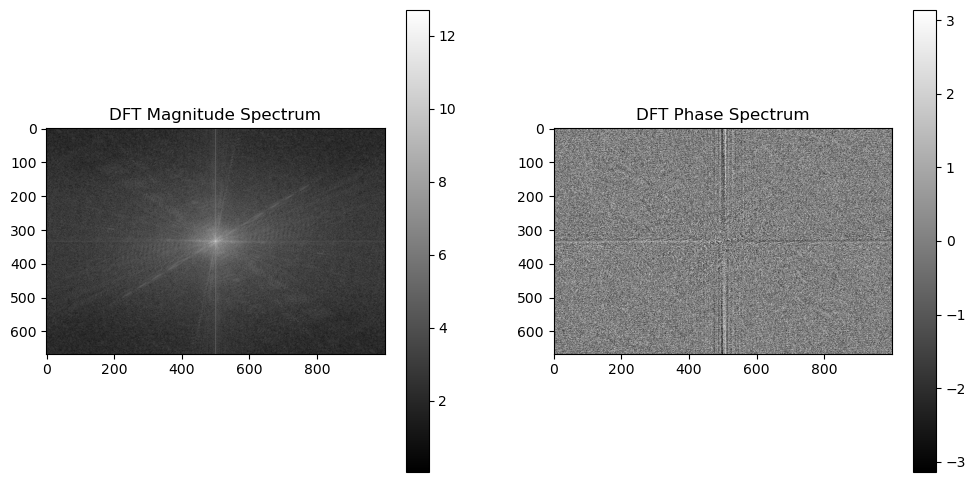

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import io

image = io.imread('mines.png', as_gray=True)

# 1. Compute the DFT of the image
dft = fft2(image)
dft_shifted = fftshift(dft)

# 2. Display the DFT magnitude and phase as images
magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)
phase_spectrum = np.angle(dft_shifted)

# Plot DFT Magnitude
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.colorbar()

# Plot DFT Phase
plt.subplot(1, 2, 2)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('DFT Phase Spectrum')
plt.colorbar()
plt.show()


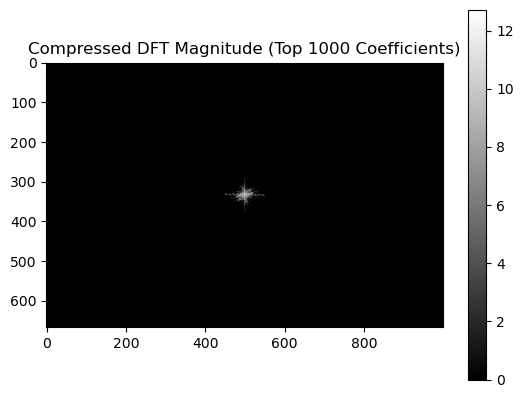

In [5]:

# 3. Compress the image by keeping only the top 1000 DFT coefficients
# Flatten the magnitude spectrum and sort by the top 1000 values
flattened_dft = np.abs(dft_shifted).flatten()
indices = np.argsort(flattened_dft)[-1000:]  # Top 1000 indices

# Create a mask to keep only the top 1000 coefficients
compressed_dft = np.zeros_like(dft_shifted)
flat_dft_shifted = dft_shifted.flatten()
compressed_dft_flat = np.zeros_like(flat_dft_shifted)
compressed_dft_flat[indices] = flat_dft_shifted[indices]
compressed_dft = compressed_dft_flat.reshape(dft_shifted.shape)

# 4. Display the DFT magnitude image with the top 1000 coefficients
compressed_magnitude_spectrum = np.log(np.abs(compressed_dft) + 1)

plt.figure()
plt.imshow(compressed_magnitude_spectrum, cmap='gray')
plt.title('Compressed DFT Magnitude (Top 1000 Coefficients)')
plt.colorbar()
plt.show()



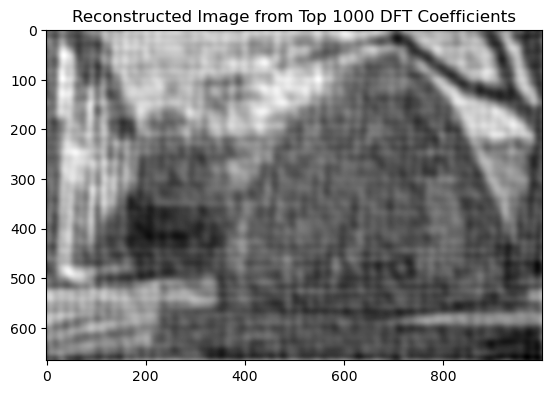

In [6]:
# 5. Reconstruct the original image using inverse DFT
# Apply the inverse shift and inverse DFT
compressed_dft_ishifted = ifftshift(compressed_dft)
reconstructed_image = np.abs(ifft2(compressed_dft_ishifted))

# 6. Display the resulting reconstructed image
plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image from Top 1000 DFT Coefficients')
plt.show()



In [7]:
# 7. Answer: How many elements/pixels does the original image have? 
original_pixels = image.size

# How many elements does the DFT compression have?
compressed_elements = 1000  # Since we kept only the top 1000 coefficients

# What is the compression ratio?
compression_ratio = original_pixels / compressed_elements

print(f"Original image size: {original_pixels} pixels")
print(f"Compressed image size: {compressed_elements} DFT coefficients")
print(f"Compression ratio: {compression_ratio:.2f}")


Original image size: 666000 pixels
Compressed image size: 1000 DFT coefficients
Compression ratio: 666.00


**Problem 2 (tbd pts): Simple Canny Edge Detector**
- Filter the Mines image with derivatives of Gaussian filters to find its 𝑥𝑥 and 𝑦𝑦 gradients 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦: 
  -  Create a Gaussian filter kernel of 𝜎 = 1.4 with appropriate size  
  - Display the Gaussian filter kernel as an image 
  - Convolve the Gaussian kernel with 1D derivate filter kernels along the 𝑥𝑥 and 𝑦𝑦 directions 
to obtain derivative of Gaussian kernels 
  - Display both 𝑥𝑥 and 𝑦𝑦 derivative of Gaussian kernels as images 
  - Filter the Mines image with derivative of Gaussian filters to obtain 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 
  - Display 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 
- Compute the magnitude and orientation (theta) of gradient  
- Display both magnitude and orientation of gradient as images 
- Remove pixels in the magnitude image that are below a certain threshold (pick the threshold 
appropriately to keep edges) 
- Display the resulting edge image

**Notes:**  
- The size of the Gaussian filter kernel should be large enough so that the pixels on the edge of 
the kernel image are close to zero 
- See the examples in lectures “04_1_Edge_Detection” and “04_2_Edge_Detection_II” 

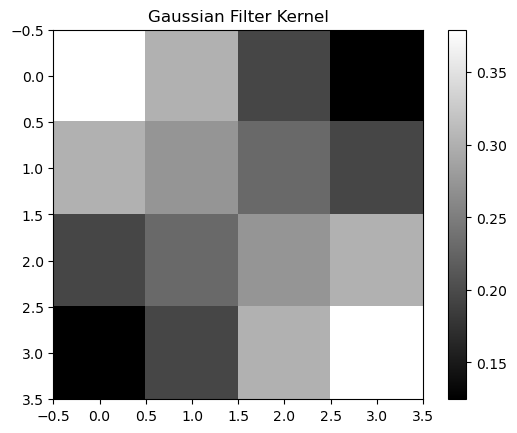

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, convolve1d
from skimage import io, color

# Load the Mines image (grayscale)
image = io.imread('mines.png', as_gray=True)

# Gaussian Filter
sigma = 1.4
size = int(3 * sigma)
gaussian_kernel = gaussian_filter(np.eye(size), sigma=sigma)


plt.figure()
plt.imshow(gaussian_kernel, cmap='gray')
plt.title('Gaussian Filter Kernel')
plt.colorbar()
plt.show()



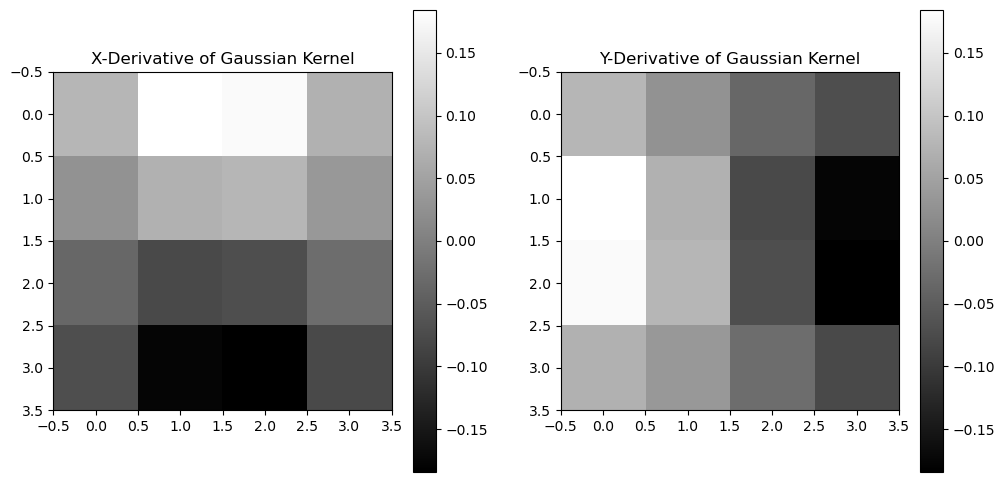

In [27]:
#convolved gaussian filter


dx = np.array([-1, 0, 1]) 
dy = np.array([[-1], [0], [1]])

# Derivative of Gaussian kernels
gaussian_deriv_x = convolve1d(gaussian_kernel, dx, axis=1)
gaussian_deriv_y = convolve1d(gaussian_kernel, dy.flatten(), axis=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gaussian_deriv_x, cmap='gray')
plt.title('X-Derivative of Gaussian Kernel')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(gaussian_deriv_y, cmap='gray')
plt.title('Y-Derivative of Gaussian Kernel')
plt.colorbar()
plt.show()




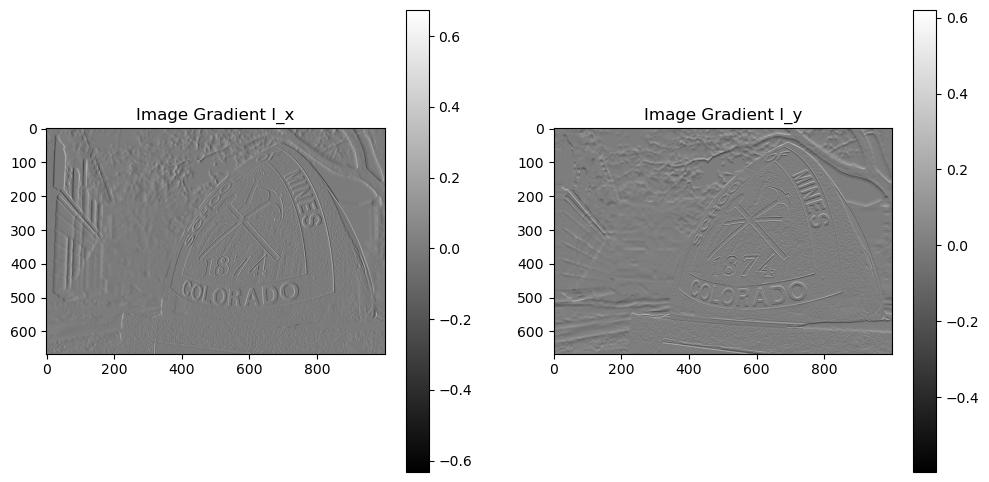

In [23]:
# 5. Filter the Mines image with derivative of Gaussian filters to obtain I_x, I_y
I_x = convolve1d(image, dx, axis=1)
I_y = convolve1d(image, dy.flatten(), axis=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I_x, cmap='gray')
plt.title('Image Gradient I_x')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I_y, cmap='gray')
plt.title('Image Gradient I_y')
plt.colorbar()
plt.show()



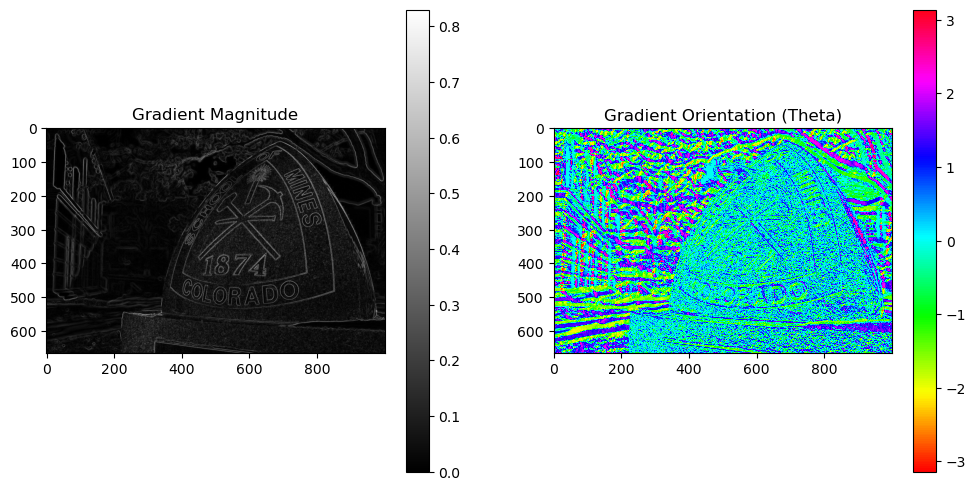

In [24]:
# 6. Compute the magnitude and orientation (theta) of gradient
gradient_magnitude = np.sqrt(I_x**2 + I_y**2)
gradient_orientation = np.arctan2(I_y, I_x)  # Orientation in radians

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(gradient_orientation, cmap='hsv')  
plt.title('Gradient Orientation (Theta)')
plt.colorbar()
plt.show()



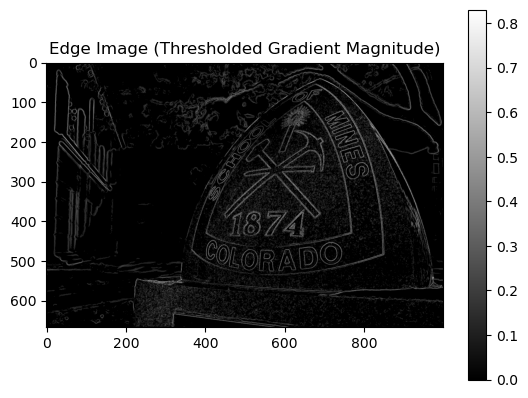

In [25]:
# 8. Remove pixels in the magnitude image that are below a certain threshold
# You can choose the threshold value based on the image or manually
threshold = np.percentile(gradient_magnitude, 75)  # Set threshold as the 75th percentile value
edge_image = np.copy(gradient_magnitude)
edge_image[edge_image < threshold] = 0  # Zero out pixels below the threshold

plt.figure()
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Image (Thresholded Gradient Magnitude)')
plt.colorbar()
plt.show()

**Problem 3 (tbd pts): Harris Corner Detector** 
- Use the Mines image as input and compute its gradients 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 via convolving the image with the 
Sobel filters (of appropriate kernel size) 
- Display 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 and their Hadamard product 𝐼𝐼𝑥𝑥∘  𝐼𝐼𝑦𝑦 as images 
- Compute the “cornerness” score 𝐶𝐶 using only 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦, and 𝐼𝐼𝑥𝑥∘  𝐼𝐼𝑦𝑦 and 𝛼𝛼 = 0.04 (see lecture 
material) 
- Display 𝐶𝐶 as an image 
- Threshed 𝐶𝐶 to pick high cornerness pixels AND display the results as an image 
- Use non-maximum suppression (with appropriate threshold) to pick corners as individual pixels  
- Display the corners as an image (with black background) AND display them overlapped on the 
original image 

**Notes:**  
- For this problem, you cannot use any existing Harris corner detector implementation 
- For non-maximum suppression, you can search the neighboring pixels of a target pixel (e.g., 
pixels in a 5x5 box centered at the target pixel) and keep the target pixel only if it has an 
intensity larger than all of its neighbors. 
- See the examples and algorithm in lecture “05_1_Features”

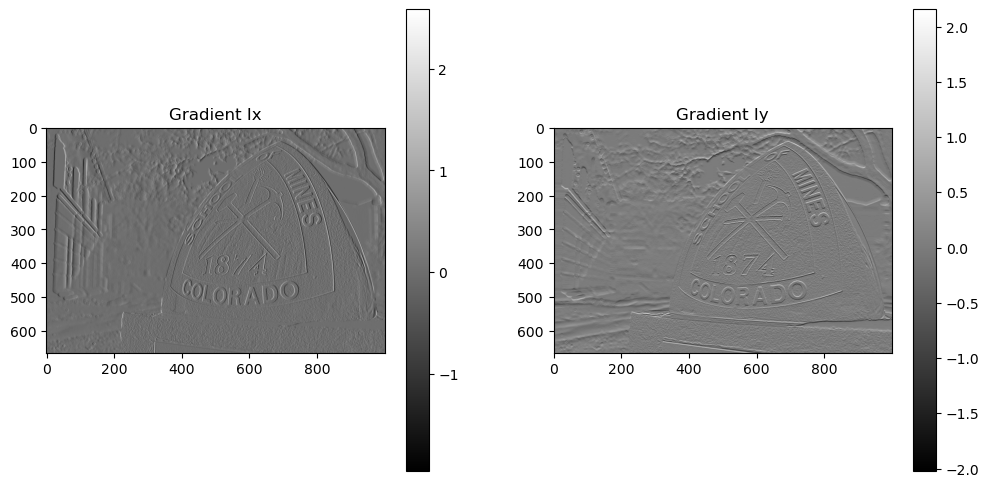

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import io, color

# Load the Mines image (grayscale)
image = io.imread('mines.png', as_gray=True)

# 1. Compute gradients Ix and Iy using Sobel filters
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])  # Sobel filter for x direction

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]])  # Sobel filter for y direction

Ix = convolve(image, sobel_x)
Iy = convolve(image, sobel_y)

# Display Ix and Iy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(Ix, cmap='gray')
plt.title('Gradient Ix')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(Iy, cmap='gray')
plt.title('Gradient Iy')
plt.colorbar()
plt.show()



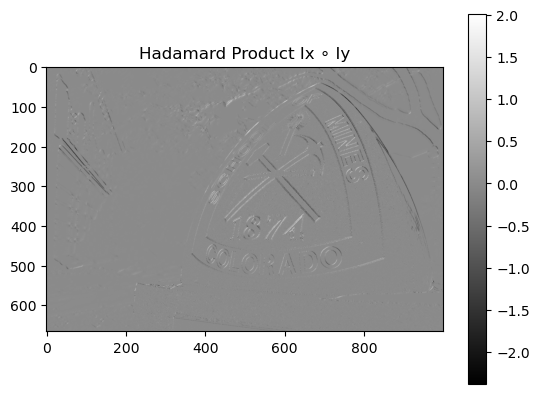

In [12]:
# 2. Compute the Hadamard product Ix * Iy (element-wise multiplication)
IxIy = Ix * Iy

# Display the Hadamard product
plt.figure()
plt.imshow(IxIy, cmap='gray')
plt.title('Hadamard Product Ix ∘ Iy')
plt.colorbar()
plt.show()



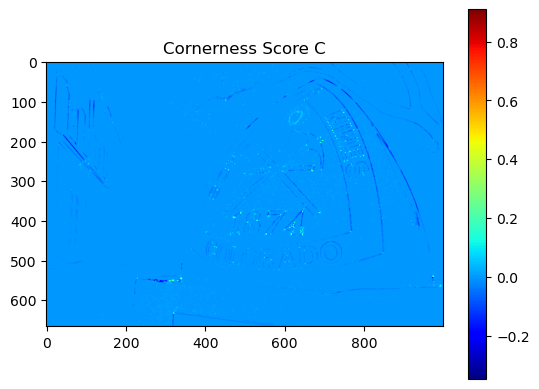

In [13]:
# 3. Compute cornerness score C using Ix, Iy, and Ix ∘ Iy
alpha = 0.04

# Compute products of derivatives
Ix2 = Ix ** 2
Iy2 = Iy ** 2

# Gaussian filters applied to Ix2, Iy2, and IxIy for smoothing (using simple averaging filter here)
window_size = 3
window = np.ones((window_size, window_size)) / (window_size ** 2)

Ix2_smoothed = convolve(Ix2, window)
Iy2_smoothed = convolve(Iy2, window)
IxIy_smoothed = convolve(IxIy, window)

# Compute the determinant and trace of the structure tensor matrix
det_M = (Ix2_smoothed * Iy2_smoothed) - (IxIy_smoothed ** 2)
trace_M = Ix2_smoothed + Iy2_smoothed

# Cornerness score C
C = det_M - alpha * (trace_M ** 2)

# 4. Display the cornerness score C as an image
plt.figure()
plt.imshow(C, cmap='jet')
plt.title('Cornerness Score C')
plt.colorbar()
plt.show()



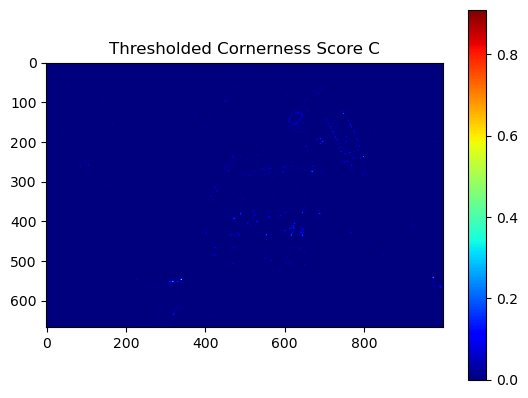

In [14]:
# 5. Threshold C to pick high cornerness pixels
threshold_C = np.percentile(C, 90)  # Set threshold as the 90th percentile
C_thresholded = np.copy(C)
C_thresholded[C_thresholded < threshold_C] = 0

plt.figure()
plt.imshow(C_thresholded, cmap='jet')
plt.title('Thresholded Cornerness Score C')
plt.colorbar()
plt.show()




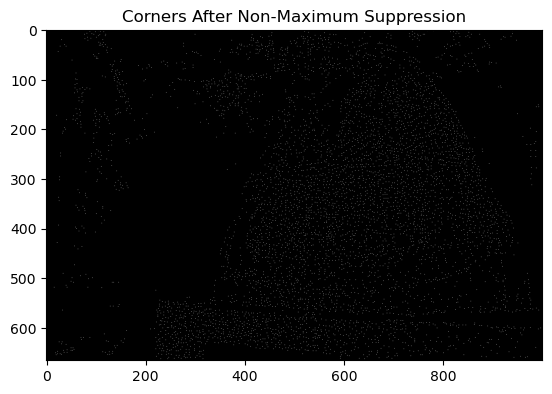

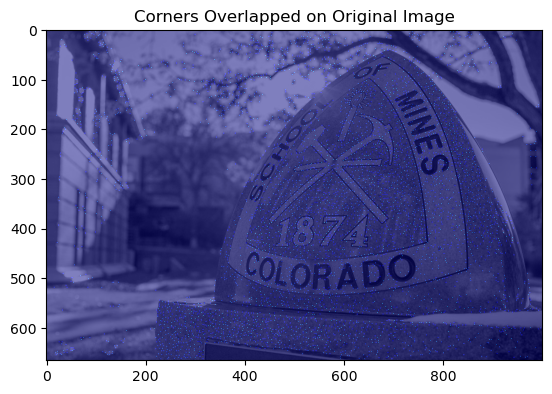

In [15]:
# 6. Non-maximum suppression (NMS)
def non_maximum_suppression(image, window_size=5):
    half_window = window_size // 2
    suppressed_image = np.zeros_like(image)
    
    # Iterate over the image and apply non-maximum suppression
    for i in range(half_window, image.shape[0] - half_window):
        for j in range(half_window, image.shape[1] - half_window):
            local_region = image[i-half_window:i+half_window+1, j-half_window:j+half_window+1]
            if image[i, j] == np.max(local_region):
                suppressed_image[i, j] = image[i, j]
    
    return suppressed_image

C_nms = non_maximum_suppression(C_thresholded)

# Display the corners as an image (with black background)
plt.figure()
plt.imshow(C_nms > 0, cmap='gray')
plt.title('Corners After Non-Maximum Suppression')
plt.show()

# 7. Display corners overlapped on the original image
plt.figure()
plt.imshow(image, cmap='gray')
plt.imshow(C_nms > 0, cmap='jet', alpha=0.5)  # Overlay corners on the original image
plt.title('Corners Overlapped on Original Image')
plt.show()